# **데이터 확인 및 EDA 과정**

### **1. 데이터 불러오기 및 문제 확인**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (1).csv
Saving vgames2_clean.csv to vgames2_clean.csv


In [ ]:
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True) # 인덱스값 들어있는 컬럼이므로 삭제.
df.info() #결측치, type 확인.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
print(df.duplicated().sum())  #중복 확인.
print(df.isna().sum())  #결측치 재확인.

1
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


In [ ]:
import re

def has_errors(inputString):
  return bool(re.search('[a-zA-Z]', inputString))   # [_!.\d+]   [a-zA-z]   [0-9]

df[df.Other_Sales.apply(has_errors)]   # 컬럼별 품질문제 확인.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
64,SD Gundam Force,GBA,2004.0,Shooter,Namco Bandai Games,0.01,0,0,0M
73,Teenage Mutant Ninja Turtles,XB,2003.0,Action,Konami Digital Entertainment,0.22,0.06,0,0.01M
209,Harry Potter and the Sorcerer's Stone,XB,2003.0,Action,Electronic Arts,0.05,0.02,0,0M
220,Dragon Quest IV: Michibikareshi Monotachi,PS,2001.0,Role-Playing,Enix Corporation,0,0,1.2,0.01M
243,Seaman 2: Peking Genjin Ikusei Kit,PS2,2007.0,Simulation,Sega,0,0,0.06,0M
...,...,...,...,...,...,...,...,...,...
16143,DJ Hero,Wii,2009.0,Misc,Activision,0.47,0.23,0K,70K
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16388,Project Setsuna,PSV,2016.0,Role-Playing,Square Enix,0,0,0.05,0K
16412,Yu-Gi-Oh! Ultimate Masters: World Championship...,GBA,2006.0,Misc,Konami Digital Entertainment,0.14,0.05,0.07,0.01M


In [ ]:
pd.set_option('display.max_rows', None)
df.Other_Sales.value_counts()  #피처값 검토.

In [ ]:
df[df.Publisher == 'Unknown']

#### ㅡ품질 및 구조적 문제



In [ ]:
# 품질 확인 결과
# Year, Genre, Publisher - 결측치 제거 데이터 양에 비해 유의미한 변화는 없어보임.
# Year - (float > int타입), '.0' 삭제, 4자리햇수로 수정, 2020년 존재 해당값 확인결과 2009년이므로 수정필요
# Sales - K,M 삭제, object > Int 타입변경, 단위는 K로 지정
# Publisher - Unknown	값 보존
# 중복값 1개 존재 - 품질 문제 해결 후 재확인 삭제조치

# 구조적 확인 결과
# Total Sales 생성 필요

In [ ]:
yea = df.Year.value_counts()
yea.index.sort_values()

Float64Index([   0.0,    1.0,    2.0,    3.0,    4.0,    5.0,    6.0,    7.0,
                 8.0,    9.0,   10.0,   11.0,   12.0,   13.0,   14.0,   15.0,
                16.0,   86.0,   94.0,   95.0,   96.0,   97.0,   98.0, 1980.0,
              1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0,
              1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0,
              1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0,
              2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0,
              2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2020.0],
             dtype='float64')

In [ ]:
df[df.Year == 2020]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0K,0,0.02


### **2. EDA 과정**

In [ ]:
df_clean = df.copy()  # EDA 과정 시작 복사본 생성.

In [ ]:
# df_clean.Year = df_clean.Year.astype(str).str[:-2].str.pad(4, fillchar='0') # .0 삭제 및 4자리수에 빈공간있을시 0으로 채움
# df_clean.Year.replace('000n', np.nan, inplace=True) # 000n으로 바뀐 결측치 수정
# 더 나은 방법을 찾았으므로 아래와같이 코드 수정
df_clean.dropna(subset=['Year', 'Genre', 'Publisher'], inplace=True)  # 사전확인한 결측치 컬럼 기준 결측치삭제.
df_clean = df_clean.astype({'Year' : 'int'})
df_clean.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [ ]:
def year(y):  #year(들여온값) 함수 생성
  if y < 18:
    return 2000 + y   # y값이 18보다 아래면 y+2000 반환
  elif y > 18 and y < 100:
    return 1900 + y   # y값이 18초과 100미만 일시 y+1900 반환
  else:
    return y    # 이외값은 들어온값 반환

df_clean.Year = df_clean.Year.apply(year)   #함수 적용
df_clean.Year = df_clean.Year.replace({2020 : 2009})  # 이상값 수정
df_clean.Year.value_counts()

2009    1429
2008    1423
2010    1253
2007    1195
2011    1133
2006    1005
2005     934
2002     826
2003     774
2004     740
2012     652
2015     611
2014     580
2013     545
2001     480
1998     377
2000     348
2016     342
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
Name: Year, dtype: int64

In [ ]:
NAK = df_clean[df_clean.NA_Sales.str.contains('K')]   # K 포함된 행 저장
NAM = df_clean[df_clean.NA_Sales.str.contains('M')]   # M 포함된 행 저장
df_clean.NA_Sales = df_clean.NA_Sales.replace({'[K]' : '','[M]' : ''}, regex=True).astype('float') # K, M 포함 행에서 지우고 float 타입변환
df_clean.NA_Sales[NAK.index] = df_clean.NA_Sales[NAK.index]*0.001 # 해당 인덱스 M 단위로 변환환

EUK = df_clean[df_clean.EU_Sales.str.contains('K')]
EUM = df_clean[df_clean.EU_Sales.str.contains('M')]
df_clean.EU_Sales = df_clean.EU_Sales.replace({'[K]' : '','[M]' : ''}, regex=True).astype('float')
df_clean.EU_Sales[EUK.index] = df_clean.EU_Sales[EUK.index]*0.001

JPK = df_clean[df_clean.JP_Sales.str.contains('K')]
JPM = df_clean[df_clean.JP_Sales.str.contains('M')]
df_clean.JP_Sales = df_clean.JP_Sales.replace({'[K]' : '','[M]' : ''}, regex=True).astype('float')
df_clean.JP_Sales[JPK.index] = df_clean.JP_Sales[JPK.index]*0.001

OTK = df_clean[df_clean.Other_Sales.str.contains('K')]
OTM = df_clean[df_clean.Other_Sales.str.contains('M')]
df_clean.Other_Sales = df_clean.Other_Sales.replace({'[K]' : '','[M]' : ''}, regex=True).astype('float')
df_clean.Other_Sales[OTK.index] = df_clean.Other_Sales[OTK.index]*0.001

df_clean['Total_Sales'] = df_clean.NA_Sales + df_clean.EU_Sales + df_clean.JP_Sales + df_clean.Other_Sales  # 총판매량 컬럼 생성

In [ ]:
df_clean.reset_index(drop=True, inplace=True)  # 품질, 구조 문제 해결 인덱스 재정렬후 중복값 제거

In [ ]:
df_clean[df_clean.duplicated(subset=['Name', 'Platform'], keep=False)]  # Need for Speed: Most Wanted 검색결과 이상없음으로 처리x

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1298,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
2621,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
7199,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.00,0.22,2.56
8543,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01
12268,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
13514,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0.00,0.06,0.00,0.02,0.08


In [ ]:
df_clean.EU_Sales[7199] = df_clean.EU_Sales[7199] + df_clean.EU_Sales[8543] # EU 합계 수치 병합
df_clean.Total_Sales[7199] = df_clean.Total_Sales[7199] + df_clean.Total_Sales[8543]  # 총 합계 수치 병합
df_clean.drop(index=8543, inplace=True) # 중복행 제거

In [ ]:
df_clean.describe() # 이상치 확인

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16240.000000,16240.000000,16240.000000,16240.000000,16240.000000,16240.000000
mean,2006.405727,0.265212,0.147387,0.078288,0.048237,0.539124
std,5.831161,0.822453,0.508354,0.309281,0.189683,1.563948
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2017.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df_clean.to_csv('vgames2_clean.csv', index=False) # EDA 마친 데이터 저장

## **3. EDA 완료된 데이터 시각화 과정**

### ㅡ플랫폼별 역대 판매량

In [ ]:
df_clean = pd.read_csv('vgames2_clean.csv') # 데이터 불러오기

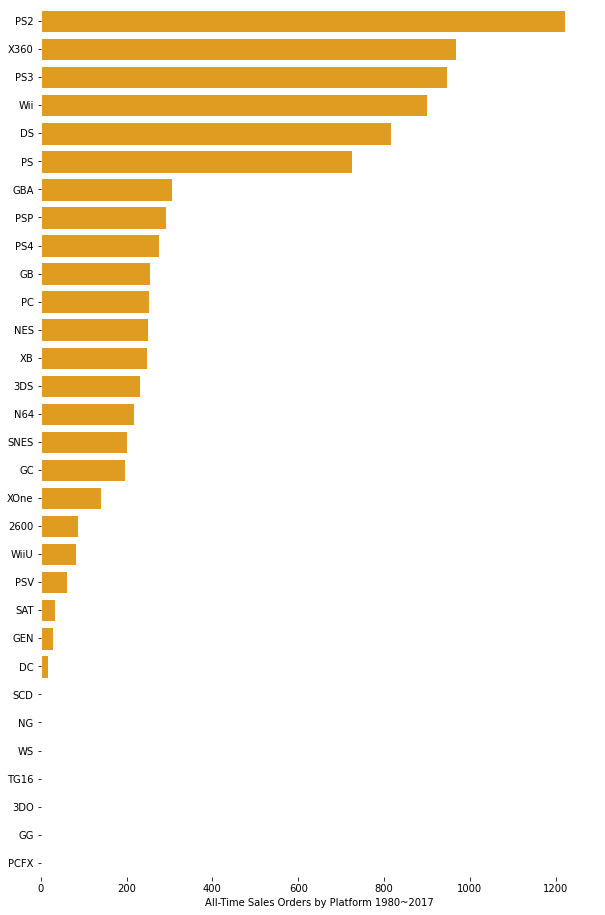

In [ ]:
# 플랫폼별 역대 판매량 확인
f, ax = plt.subplots(figsize=(10, 16))
Sales = df_clean.groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)
S_y = Sales.index
# x = 플랫폼별 총 판매량, y= 플랫폼, 
sns.set_color_codes("pastel")
sns.set_style("darkgrid")
sns.barplot(x=Sales, y=S_y, data=df_clean, color="orange")

# plot
ax.set(xlim=(0, 1300), ylabel='', xlabel="All-Time Sales Orders by Platform 1980~2017")
sns.despine(left=True, bottom=True)

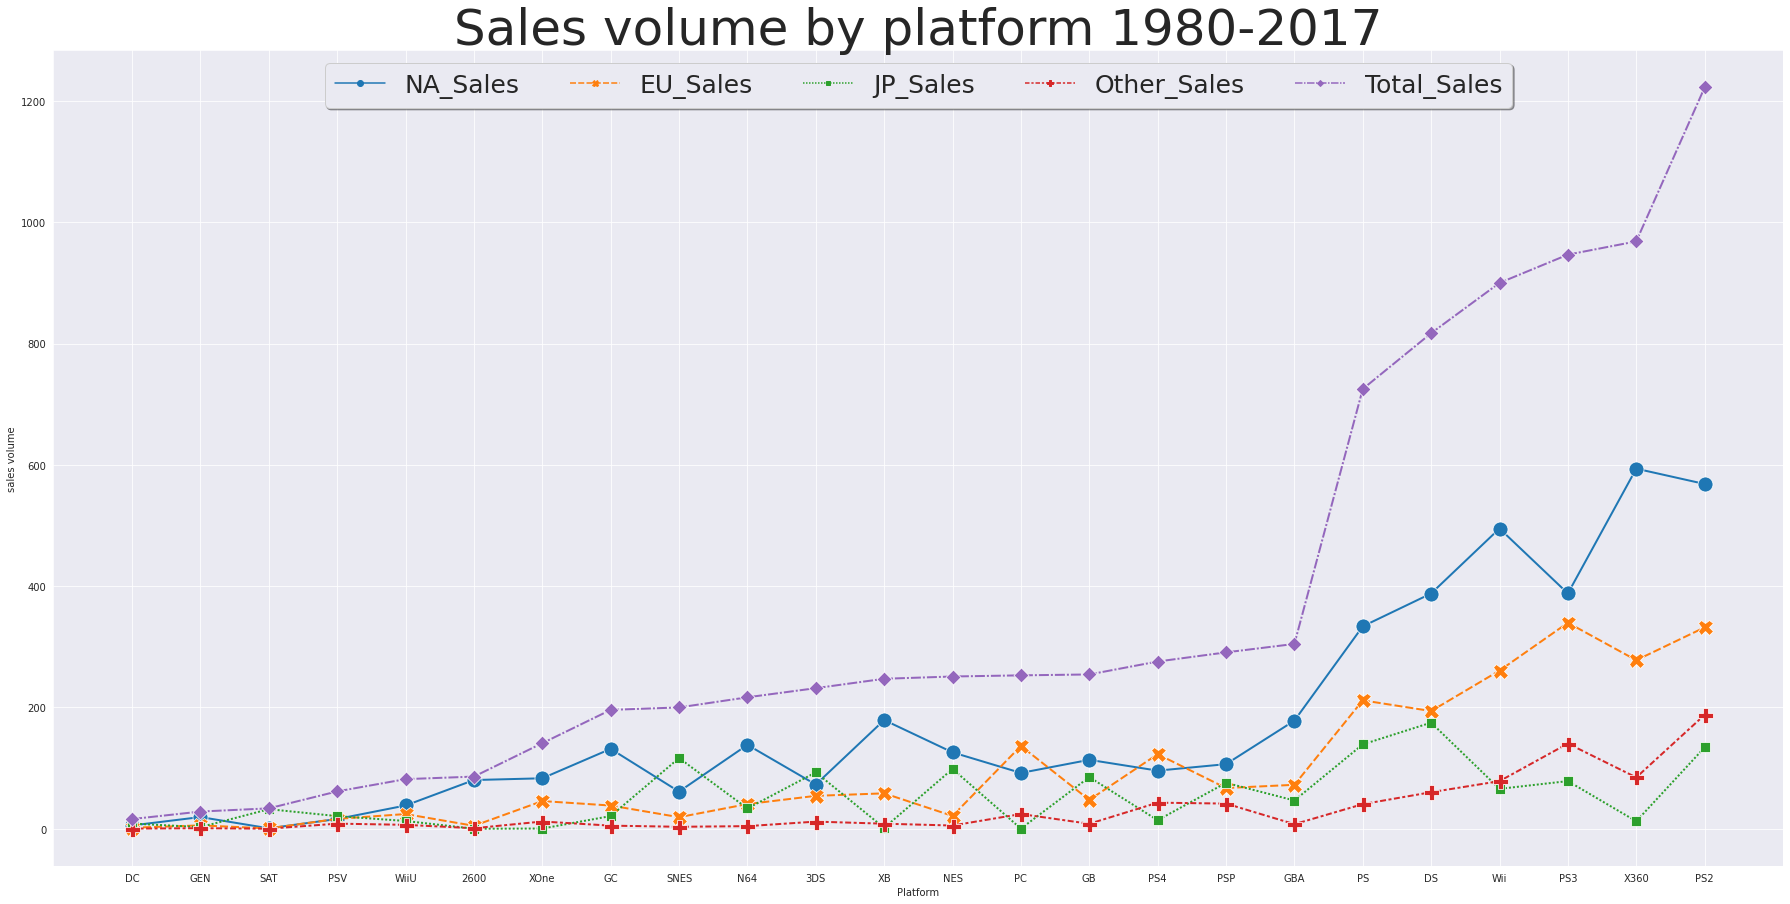

In [ ]:
# Platform 별 판매량 데이터프레임화
Sales_total = df_clean.groupby('Platform')['Total_Sales'].sum().to_frame()
Sales_NA = df_clean.groupby('Platform')['NA_Sales'].sum().to_frame()
Sales_EU = df_clean.groupby('Platform')['EU_Sales'].sum().to_frame()
Sales_JP = df_clean.groupby('Platform')['JP_Sales'].sum().to_frame()
Sales_OT = df_clean.groupby('Platform')['Other_Sales'].sum().to_frame()
#각 데이터프레임 통합, 하위7플랫폼은 의미없다 판단하여 제거
Sales_m = Sales_NA.merge(Sales_EU, how='left', on='Platform').merge(Sales_JP, how='left', on='Platform')
Sales_m = Sales_m.merge(Sales_OT, how='left', on='Platform').merge(Sales_total, how='left', on='Platform')
Sales_m.sort_values(by = 'Total_Sales', inplace=True)
Sales_m.drop(Sales_m.index[:7], inplace=True)
# plot
f, ax = plt.subplots(figsize=(31, 15))  # plot 생성 31, 15사이즈
ax = sns.lineplot(data=Sales_m, palette="tab10", linewidth=2, markers=True, markersize=15)  # ax 지정 seaborn lineplot 사용하여 
sns.set_theme(style="darkgrid", font_scale=1.8)
sns.move_legend(ax,"upper center",ncol=5, frameon=False)
ax.set(ylabel="sales volume", xlabel="Platform")
plt.title('Sales volume by platform 1980-2017', fontsize=50)
plt.legend(loc='upper center', ncol=5, fontsize=25, shadow=True)
plt.show()

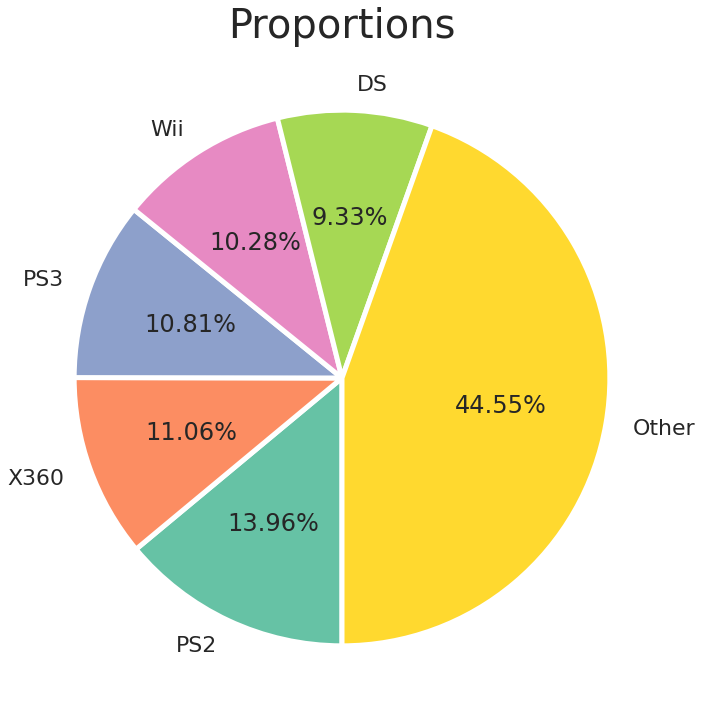

In [ ]:
# 플랫폼 Top5의 시장 점유율 확인
PS2 = df_clean.query('Platform == "PS2"').sort_values(by='Total_Sales', ascending=False)
PS2_s = PS2.Total_Sales.sum()
X360 = df_clean.query('Platform == "X360"').sort_values(by='Total_Sales', ascending=False)
X360_s = X360.Total_Sales.sum()
PS3 = df_clean.query('Platform == "PS3"').sort_values(by='Total_Sales', ascending=False)
PS3_s = PS3.Total_Sales.sum()
Wii = df_clean.query('Platform == "Wii"').sort_values(by='Total_Sales', ascending=False)
Wii_s = Wii.Total_Sales.sum()
DS = df_clean.query('Platform == "DS"').sort_values(by='Total_Sales', ascending=False)
DS_s = DS.Total_Sales.sum()
other_s = df_clean.Total_Sales.sum() - PS2_s - X360_s - PS3_s - Wii_s - DS_s

# 플랫폼별 시각화
x = [PS2_s, X360_s, PS3_s, Wii_s, DS_s, other_s]
y = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'Other']
z = {'width' : 1, 'edgecolor': 'w', 'linewidth' : 5}
c = sns.color_palette("Set2")

# plot
plt.subplots(figsize=(12,15))
sns.set_theme(font_scale=2)
plt.pie(x, labels=y, autopct='%.2f%%', colors=c, wedgeprops=z, startangle=270, counterclock=False)
plt.title('Proportions', fontsize=40)
plt.show()

### ㅡ지역에 따른 플랫폼 선호도

In [ ]:
# 지역 판매량에 따른 플랫폼 그룹화.
Platform_m = df_clean.groupby('Platform')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'].sum()
Platform_m.sort_values(by='Total_Sales', ascending=False, inplace=True)
Platform_m

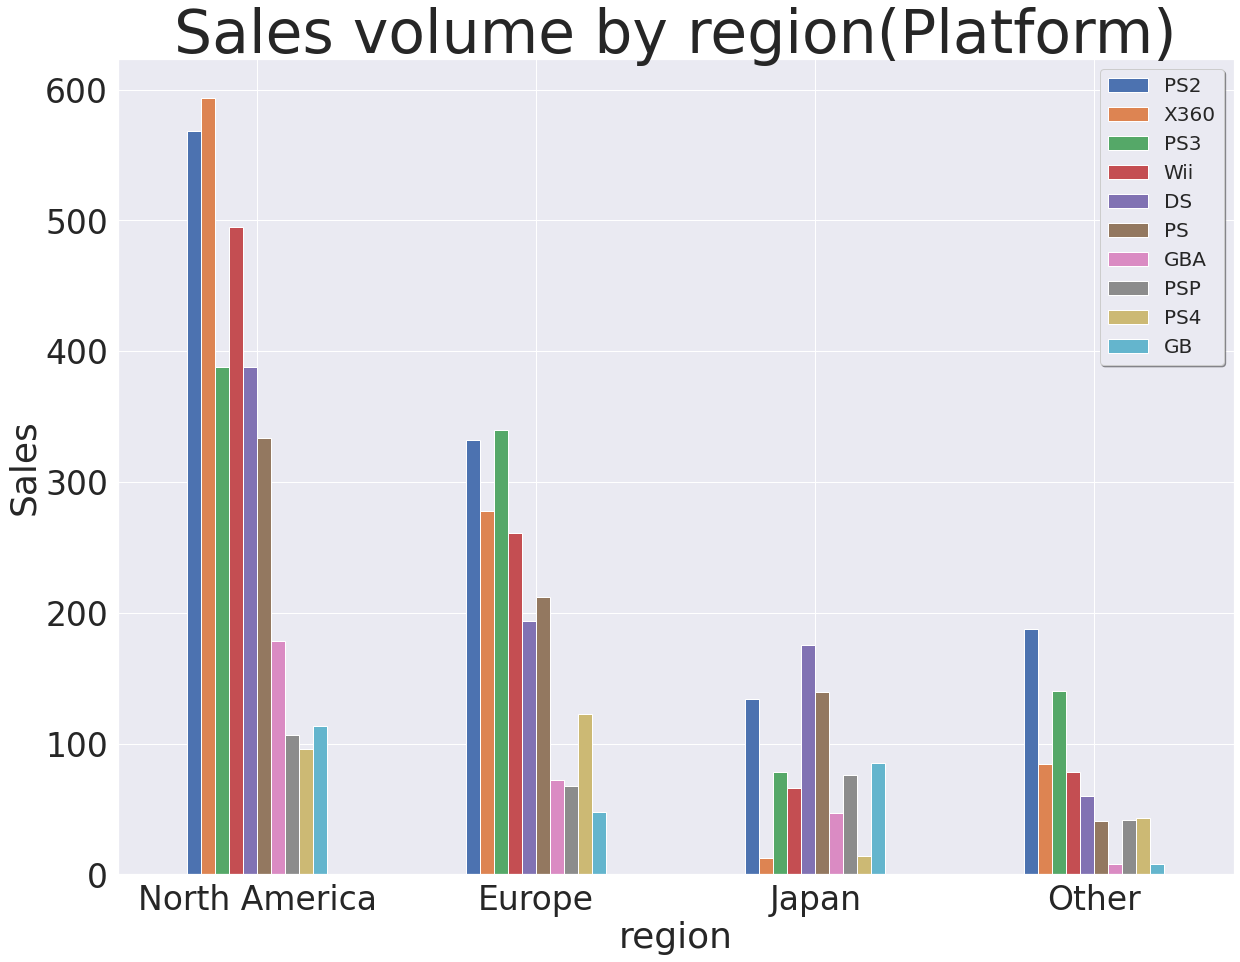

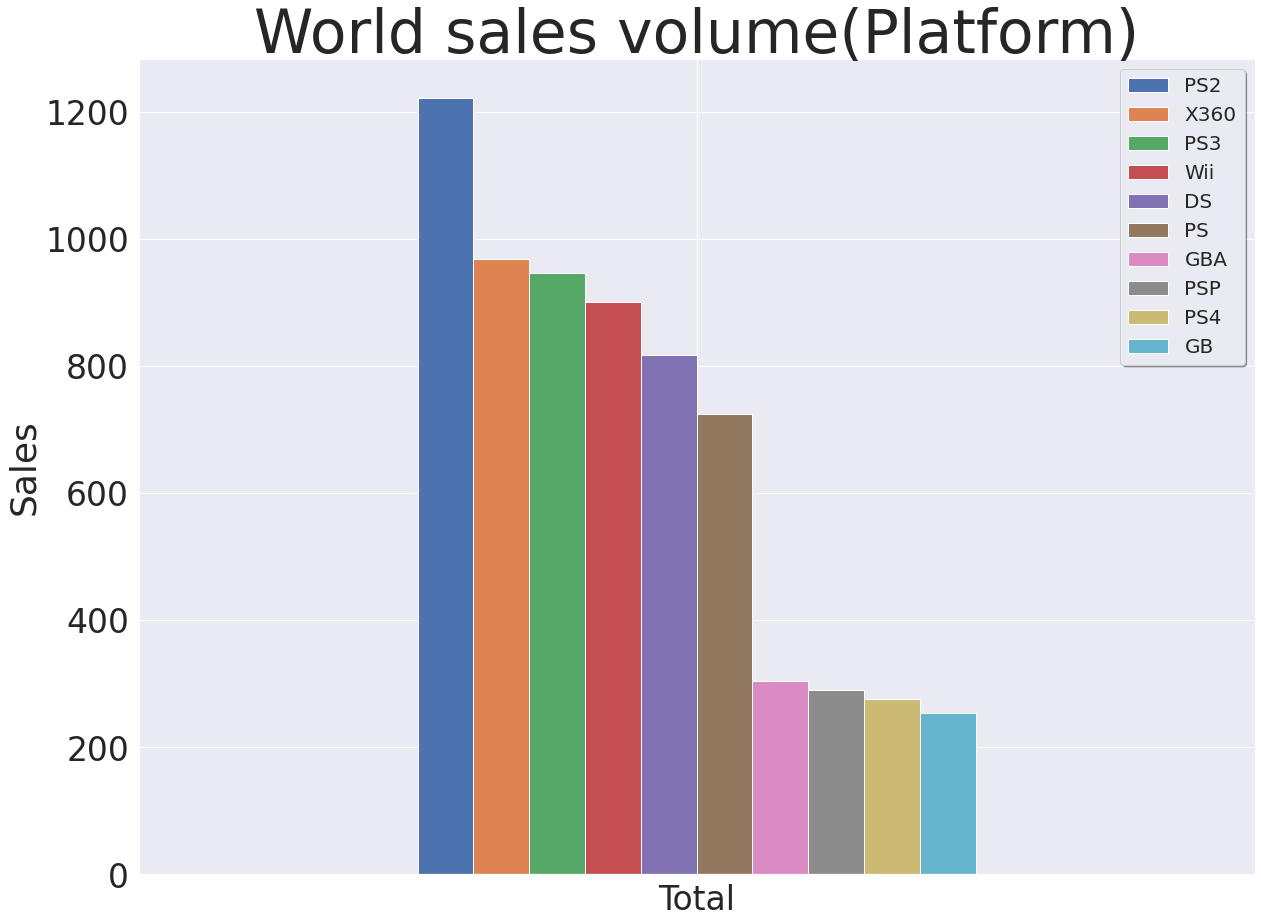

In [ ]:
# 지역별 상위10개 플랫폼 판매량 비교 그래프 시각화
Platform_m.columns = ['North America', 'Europe', 'Japan', 'Other', 'Total']
pm = Platform_m.head(10).T
pmt = pm.iloc[4].to_frame().T
pm.drop(index=['Total'], inplace=True)
sns.set_color_codes("pastel")
sns.set_theme(style="darkgrid", font_scale=3)
pm.plot.bar(xlabel='region', ylabel='Sales', figsize=(20, 15))
plt.legend(loc='upper right', fontsize=20, frameon=True, shadow=True)
plt.title('Sales volume by region(Platform)', fontsize=60)
plt.xticks(rotation=0)
plt.show()
# 세계 판매량 비교 그래프 시각화
pmt.plot.bar(ylabel='Sales', figsize=(20, 15))
plt.legend(loc='upper right', fontsize=20, frameon=True, shadow=True)
plt.title('World sales volume(Platform)', fontsize=60)
plt.xticks(rotation=0)
plt.show()

### ㅡ장르별 지역 판매량

In [ ]:
df_clean.query('Genre == "Action"').sort_values(by='Total_Sales', ascending=False).head(30) #장르별 탑30 확인
# 장르별 탑30 확인중 FIFA Soccer 13 게임이 Sports 장르인걸 확인. 해당사항 수정
df_clean.Genre.iloc[8856] = 'Sports'

In [ ]:
# 장르별 지역판매량 데이터프레임화, 통합
Genre_m = df_clean.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'].sum()
Genre_m.sort_values(by='Total_Sales', ascending=False, inplace=True)
Genre_m

<ipython-input-17-15df978faaa8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Genre_m = df_clean.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales'].sum()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,857.69,508.59,156.47,181.98,1704.73
Sports,668.32,376.02,134.89,134.36,1313.59
Shooter,574.48,310.23,38.18,101.86,1024.75
Role-Playing,318.76,183.09,342.93,56.73,901.51
Platform,445.38,200.63,130.53,51.45,827.99
Misc,394.73,208.15,104.18,72.64,779.70
Racing,354.70,235.02,56.32,76.51,722.55
Fighting,220.35,99.90,87.14,36.15,443.54
Simulation,181.43,112.99,63.54,31.32,389.28


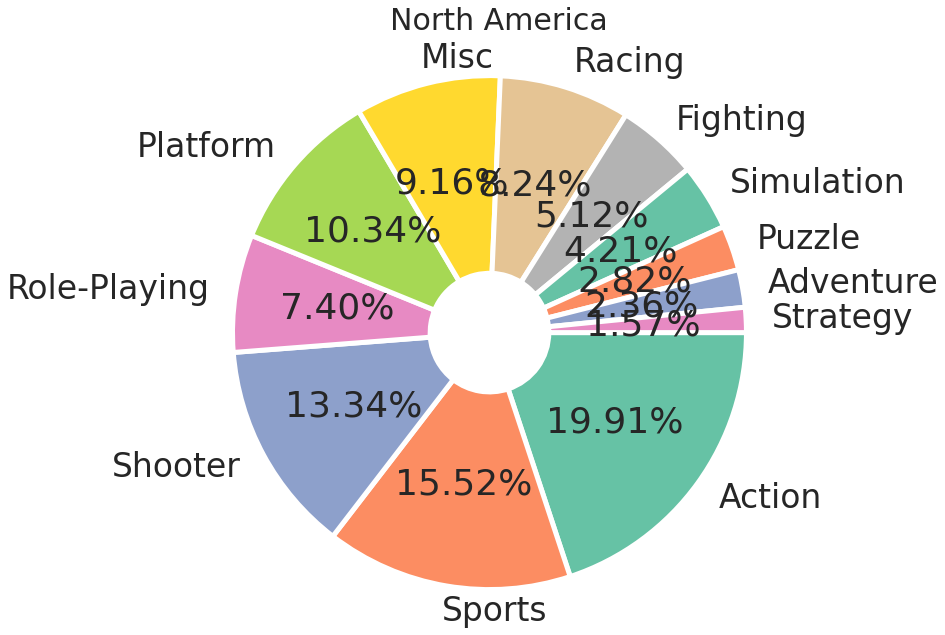

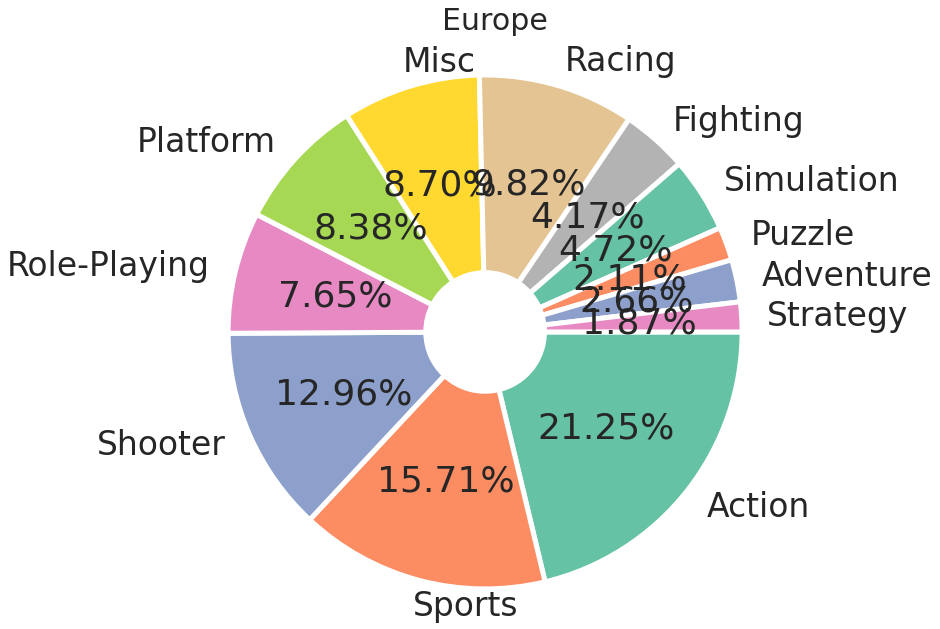

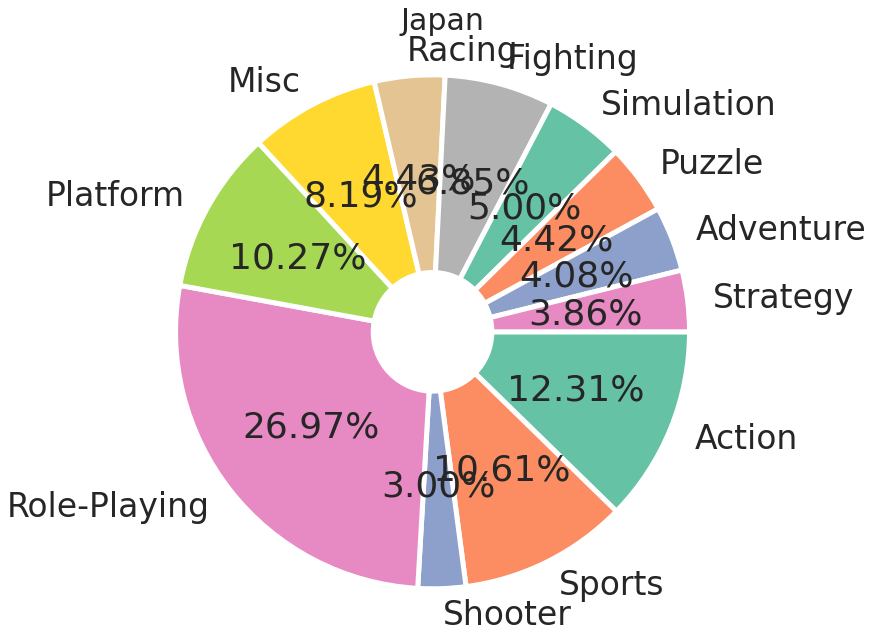

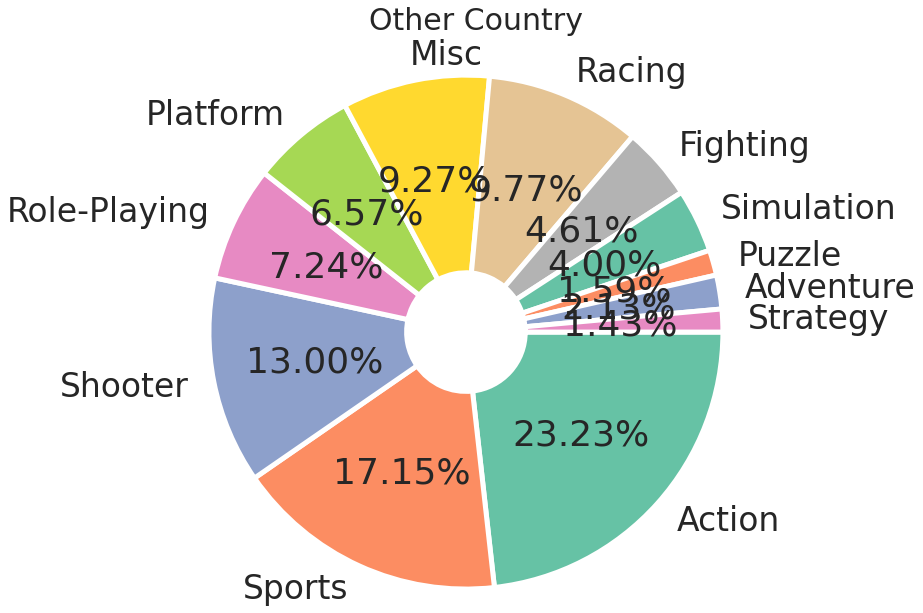

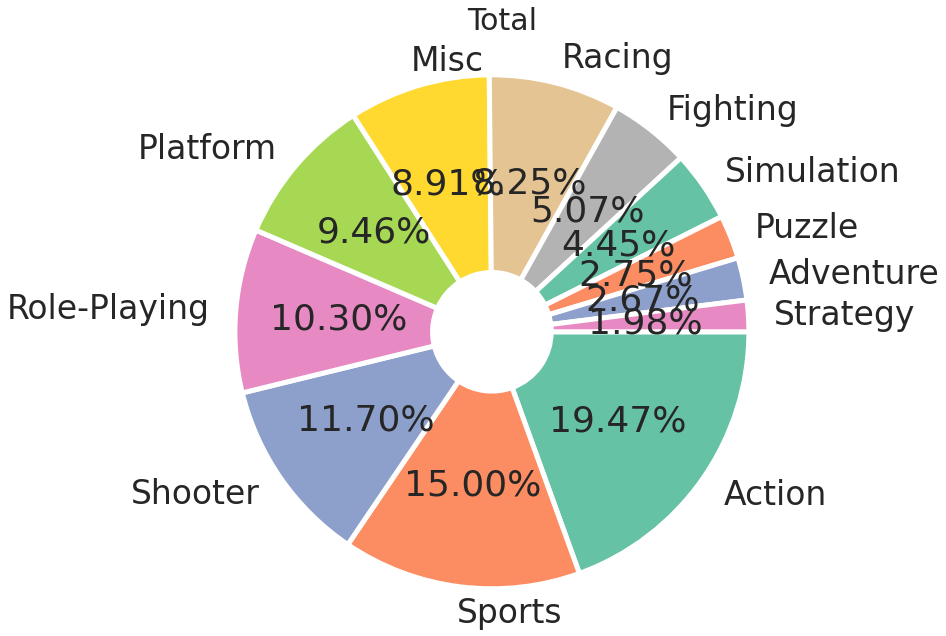

In [ ]:
# 지역별 판매량중 장르의 비율
# NA 시각화
x = Genre_m['NA_Sales']
y = Genre_m.index
z = {'width' : 10, 'edgecolor': 'w', 'linewidth' : 5}
c = sns.color_palette("Set2")

fig, ax = plt.subplots()
ax.pie(x, labels=y, autopct='%.2f%%', center=(5,-4), radius=13, colors=c, wedgeprops=z, counterclock=False)
ax.set(xlim=(0, 11), ylim=(0, 11))
ax.set_title(label='North America', fontsize=30)
plt.show()

# EU 시각화
x = Genre_m['EU_Sales']
y = Genre_m.index
z = {'width' : 10, 'edgecolor': 'w', 'linewidth' : 5}
c = sns.color_palette("Set2")

fig, ax = plt.subplots()
ax.pie(x, labels=y, autopct='%.2f%%', center=(5,-4), radius=13, colors=c, wedgeprops=z, counterclock=False)
ax.set(xlim=(0, 11), ylim=(0, 11))
ax.set_title(label='Europe', fontsize=30)
plt.show()

# JP 시각화
x = Genre_m['JP_Sales']
y = Genre_m.index
z = {'width' : 10, 'edgecolor': 'w', 'linewidth' : 5}
c = sns.color_palette("Set2")

fig, ax = plt.subplots()
ax.pie(x, labels=y, autopct='%.2f%%', center=(5,-4), radius=13, colors=c, wedgeprops=z, counterclock=False)
ax.set(xlim=(0, 11), ylim=(0, 11))
ax.set_title(label='Japan', fontsize=30)
plt.show()

# Other 시각화
x = Genre_m['Other_Sales']
y = Genre_m.index
z = {'width' : 10, 'edgecolor': 'w', 'linewidth' : 5}
c = sns.color_palette("Set2")

fig, ax = plt.subplots()
ax.pie(x, labels=y, autopct='%.2f%%', center=(5,-4), radius=13, colors=c, wedgeprops=z, counterclock=False)
ax.set(xlim=(0, 11), ylim=(0, 11))
ax.set_title(label='Other Country', fontsize=30)
plt.show()

# Total 시각화
x = Genre_m['Total_Sales']
y = Genre_m.index
z = {'width' : 10, 'edgecolor': 'w', 'linewidth' : 5}
c = sns.color_palette("Set2")

fig, ax = plt.subplots()
ax.pie(x, labels=y, autopct='%.2f%%', center=(5,-4), radius=13, colors=c, wedgeprops=z, counterclock=False)
ax.set(xlim=(0, 11), ylim=(0, 11))
ax.set_title(label='Total', fontsize=30)
plt.show()

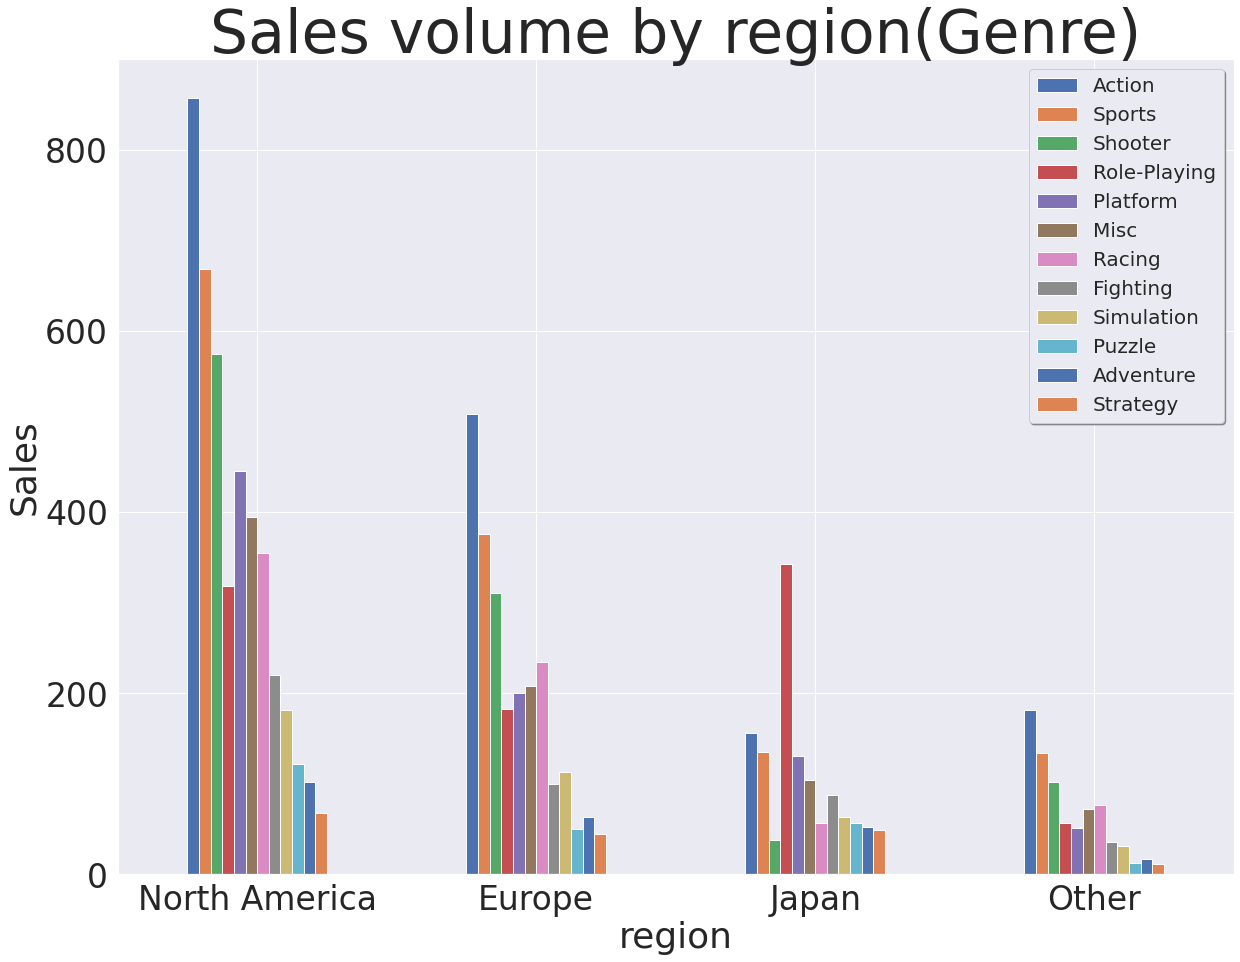

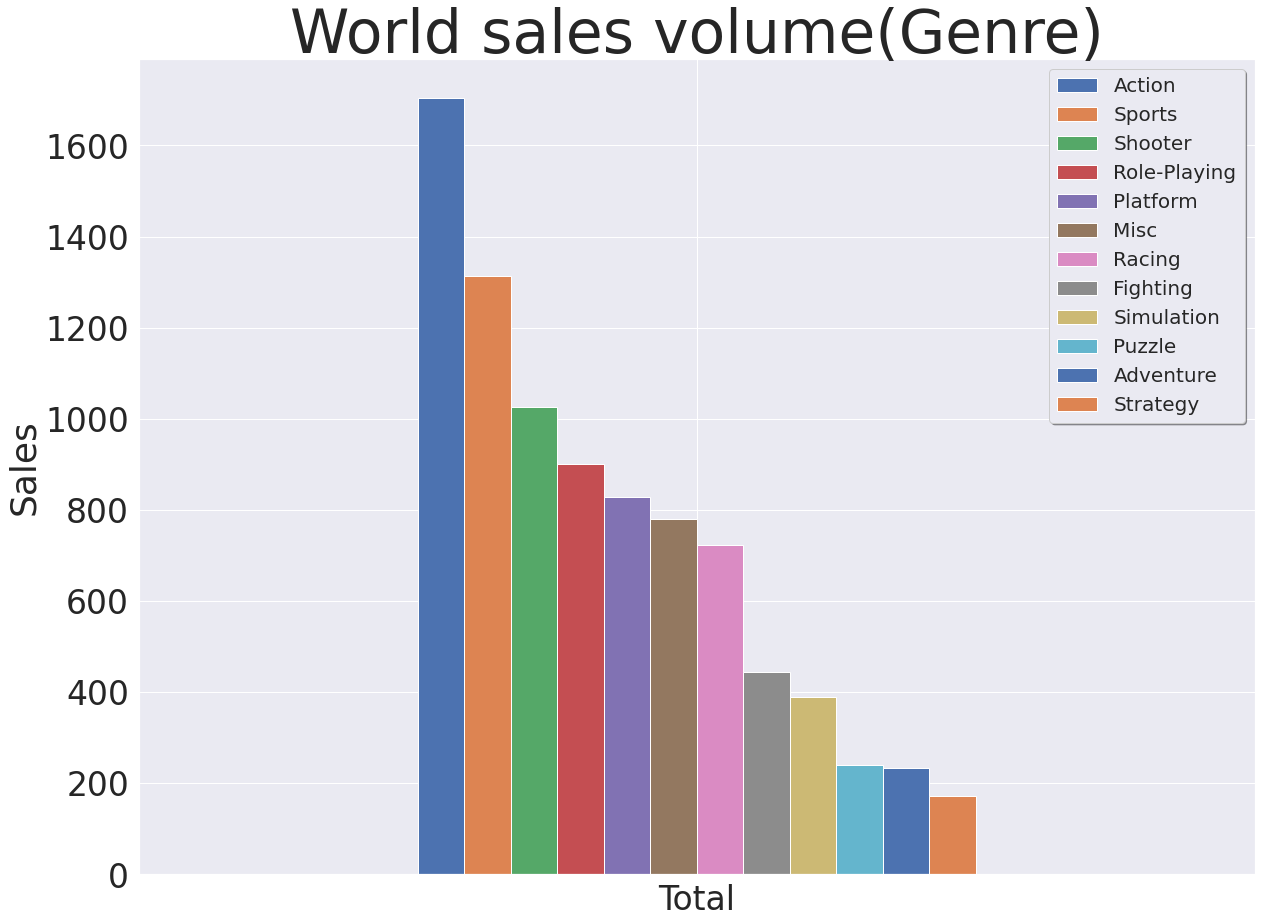

In [ ]:
# 지역별 장르판매량 비교 그래프 시각화
Genre_m.columns = ['North America', 'Europe', 'Japan', 'Other', 'Total']
gm = Genre_m.T
gmt = gm.iloc[4].to_frame().T
gm.drop(index=['Total'], inplace=True)
sns.set_color_codes("pastel")
sns.set_theme(style="darkgrid", font_scale=3)
gm.plot.bar(xlabel='region', ylabel='Sales', figsize=(20, 15))
plt.legend(loc='upper right', fontsize=20, frameon=True, shadow=True)
plt.title('Sales volume by region(Genre)', fontsize=60)
plt.xticks(rotation=0)
plt.show()
# 세계 판매량 비교 그래프 시각화화
gmt.plot.bar(ylabel='Sales', figsize=(20, 15))
plt.legend(loc='upper right', fontsize=20, frameon=True, shadow=True)
plt.title('World sales volume(Genre)', fontsize=60)
plt.xticks(rotation=0)
plt.show()

In [ ]:
# 장르 드랍 판매량만 남기기
Sales_c = Genre_m.reset_index()
Sales_c = Sales_c.drop(columns='Genre')
Sales_c

,North America,Europe,Japan,Other,Total
0,857.69,508.59,156.47,181.98,1704.73
1,668.32,376.02,134.89,134.36,1313.59
2,574.48,310.23,38.18,101.86,1024.75
3,318.76,183.09,342.93,56.73,901.51
4,445.38,200.63,130.53,51.45,827.99
5,394.73,208.15,104.18,72.64,779.70
6,354.70,235.02,56.32,76.51,722.55
7,220.35,99.90,87.14,36.15,443.54
8,181.43,112.99,63.54,31.32,389.28
9,121.58,50.47,56.24,12.44,240.73


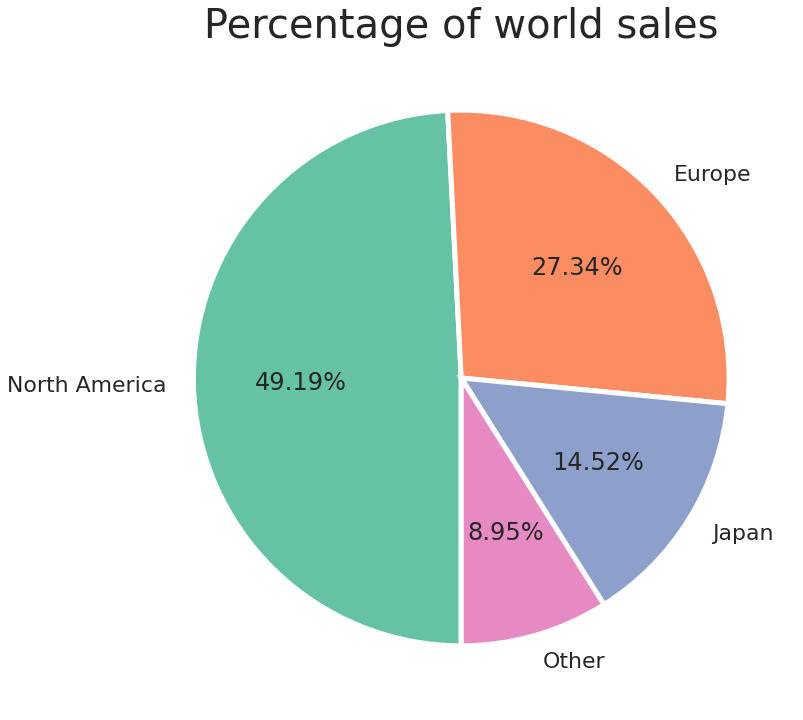

In [ ]:
# 지역별 판매량 합계
NA = Sales_c['North America'].sum()
EU = Sales_c['Europe'].sum()
JP = Sales_c['Japan'].sum()
OT = Sales_c['Other'].sum()

# plot
Sales = [NA, EU, JP, OT]
labels = ['North America', 'Europe', 'Japan', 'Other']
z = {'width' : 1, 'edgecolor': 'w', 'linewidth' : 5}
c = sns.color_palette("Set2")

plt.subplots(figsize=(12,15))
sns.set_theme(font_scale=2)
plt.pie(Sales, labels=labels, autopct='%.2f%%', colors=c, wedgeprops=z, startangle=270, counterclock=False)
plt.title('Percentage of world sales', fontsize=40)
plt.show()

In [ ]:
# 장르와 판매량은 관련이 있는가?
# 카이제곱검정을 통해 검정한다.
# 카이제곱검정이란?
# 두 범주형 변수가 관련되어 있는지, 독립적인지 여부를 검정하는 검정기법.
# 귀무가설 : 장르와 판매량은 연관성이 없다.
# 대립가설 : 장르와 판매량은 연관성이 있다.
from scipy.stats import chi2_contingency

test = pd.crosstab(df_clean.Genre, df_clean.Total_Sales)
stat, p, dof, expected = chi2_contingency(test)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('두 샘플은 연관이 없습니다.')
else:
 print('두 샘플은 연관이 있습니다.')

stat=10224.742, p=0.000
두 샘플은 연관이 있습니다.


### ㅡ연도별 게임 트렌드

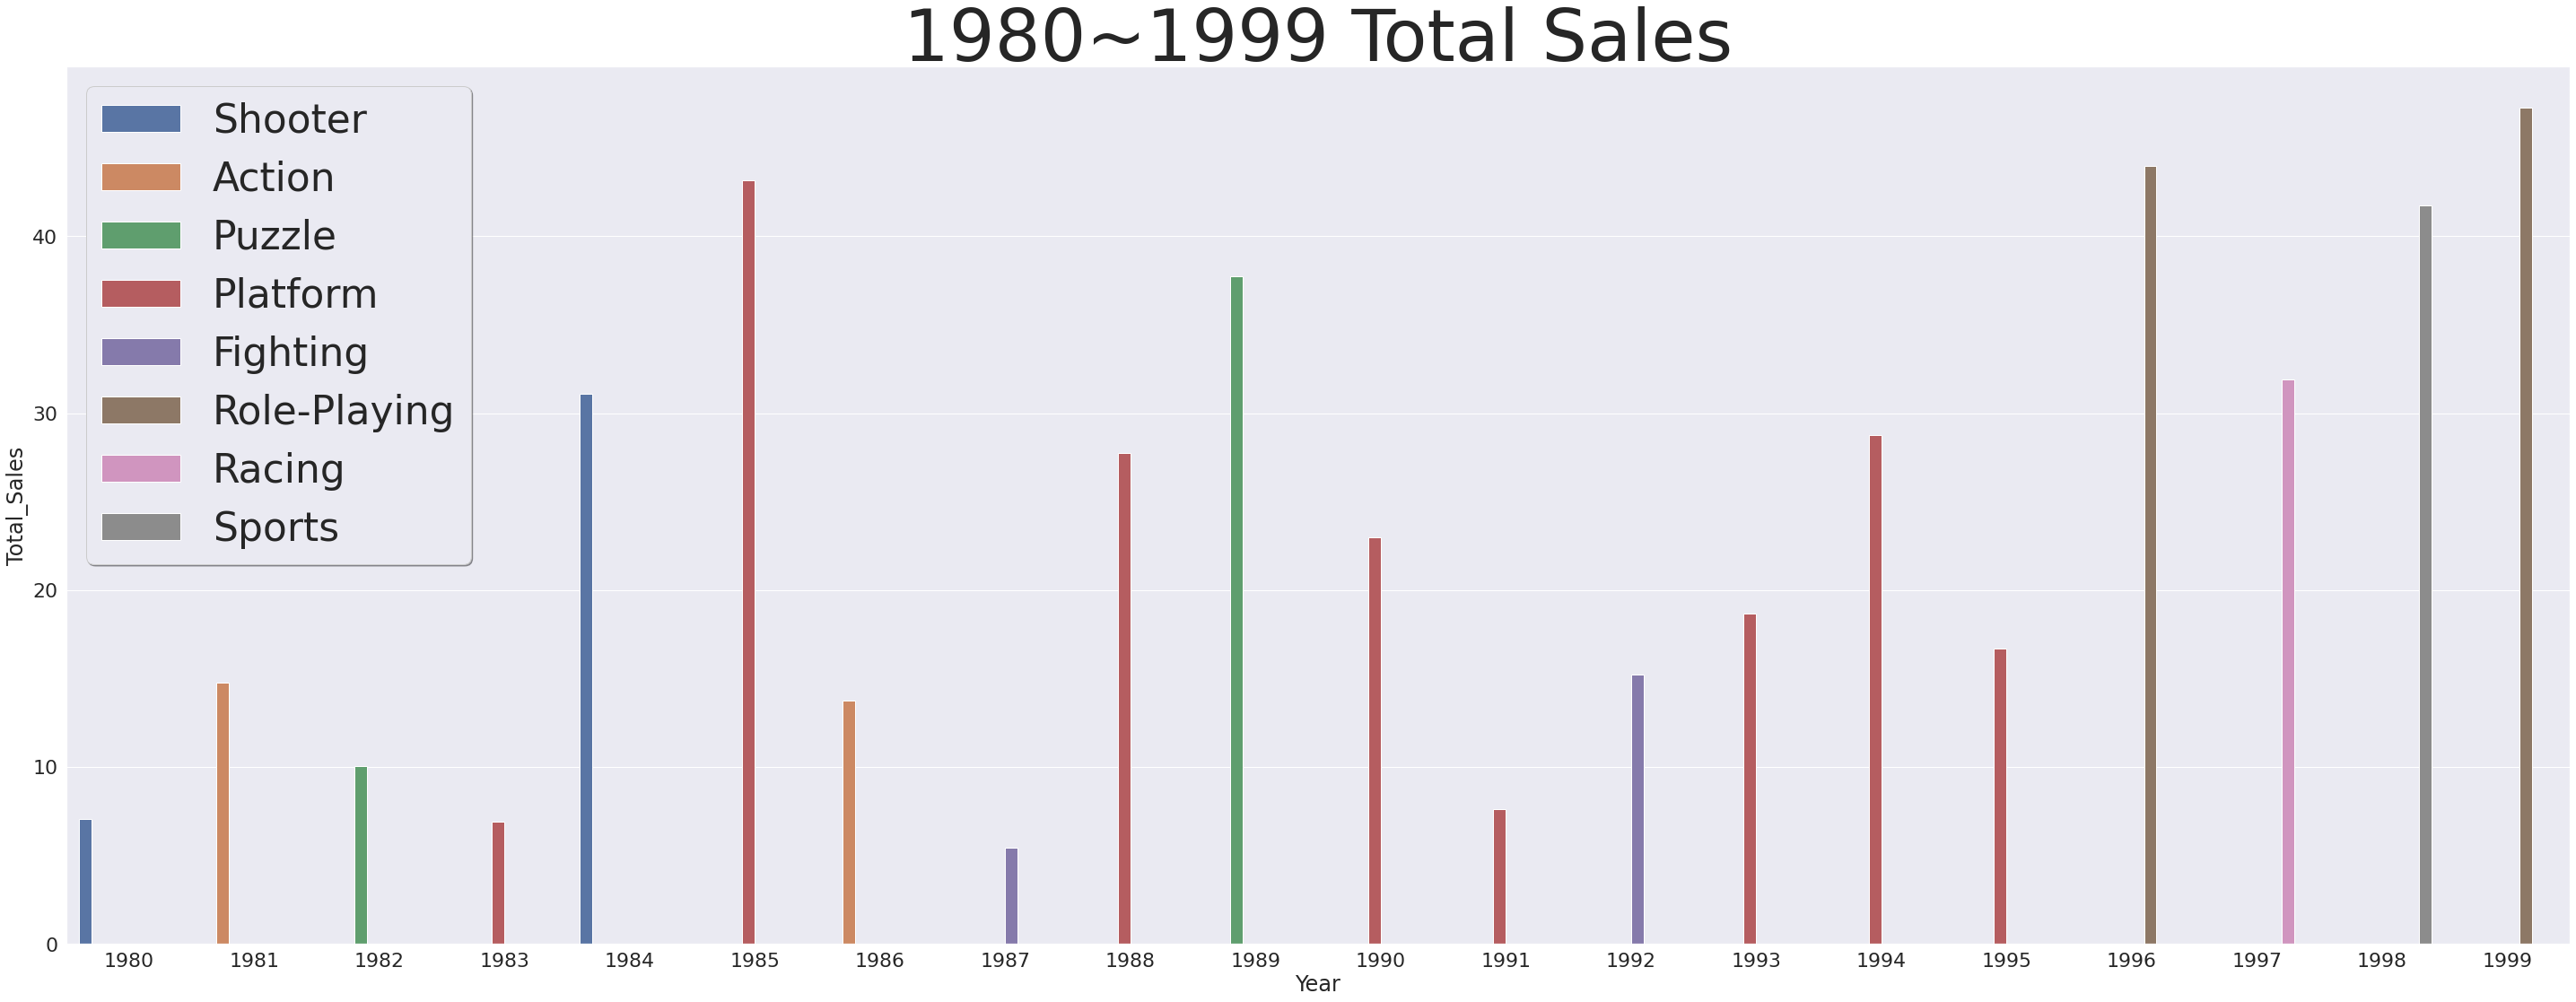

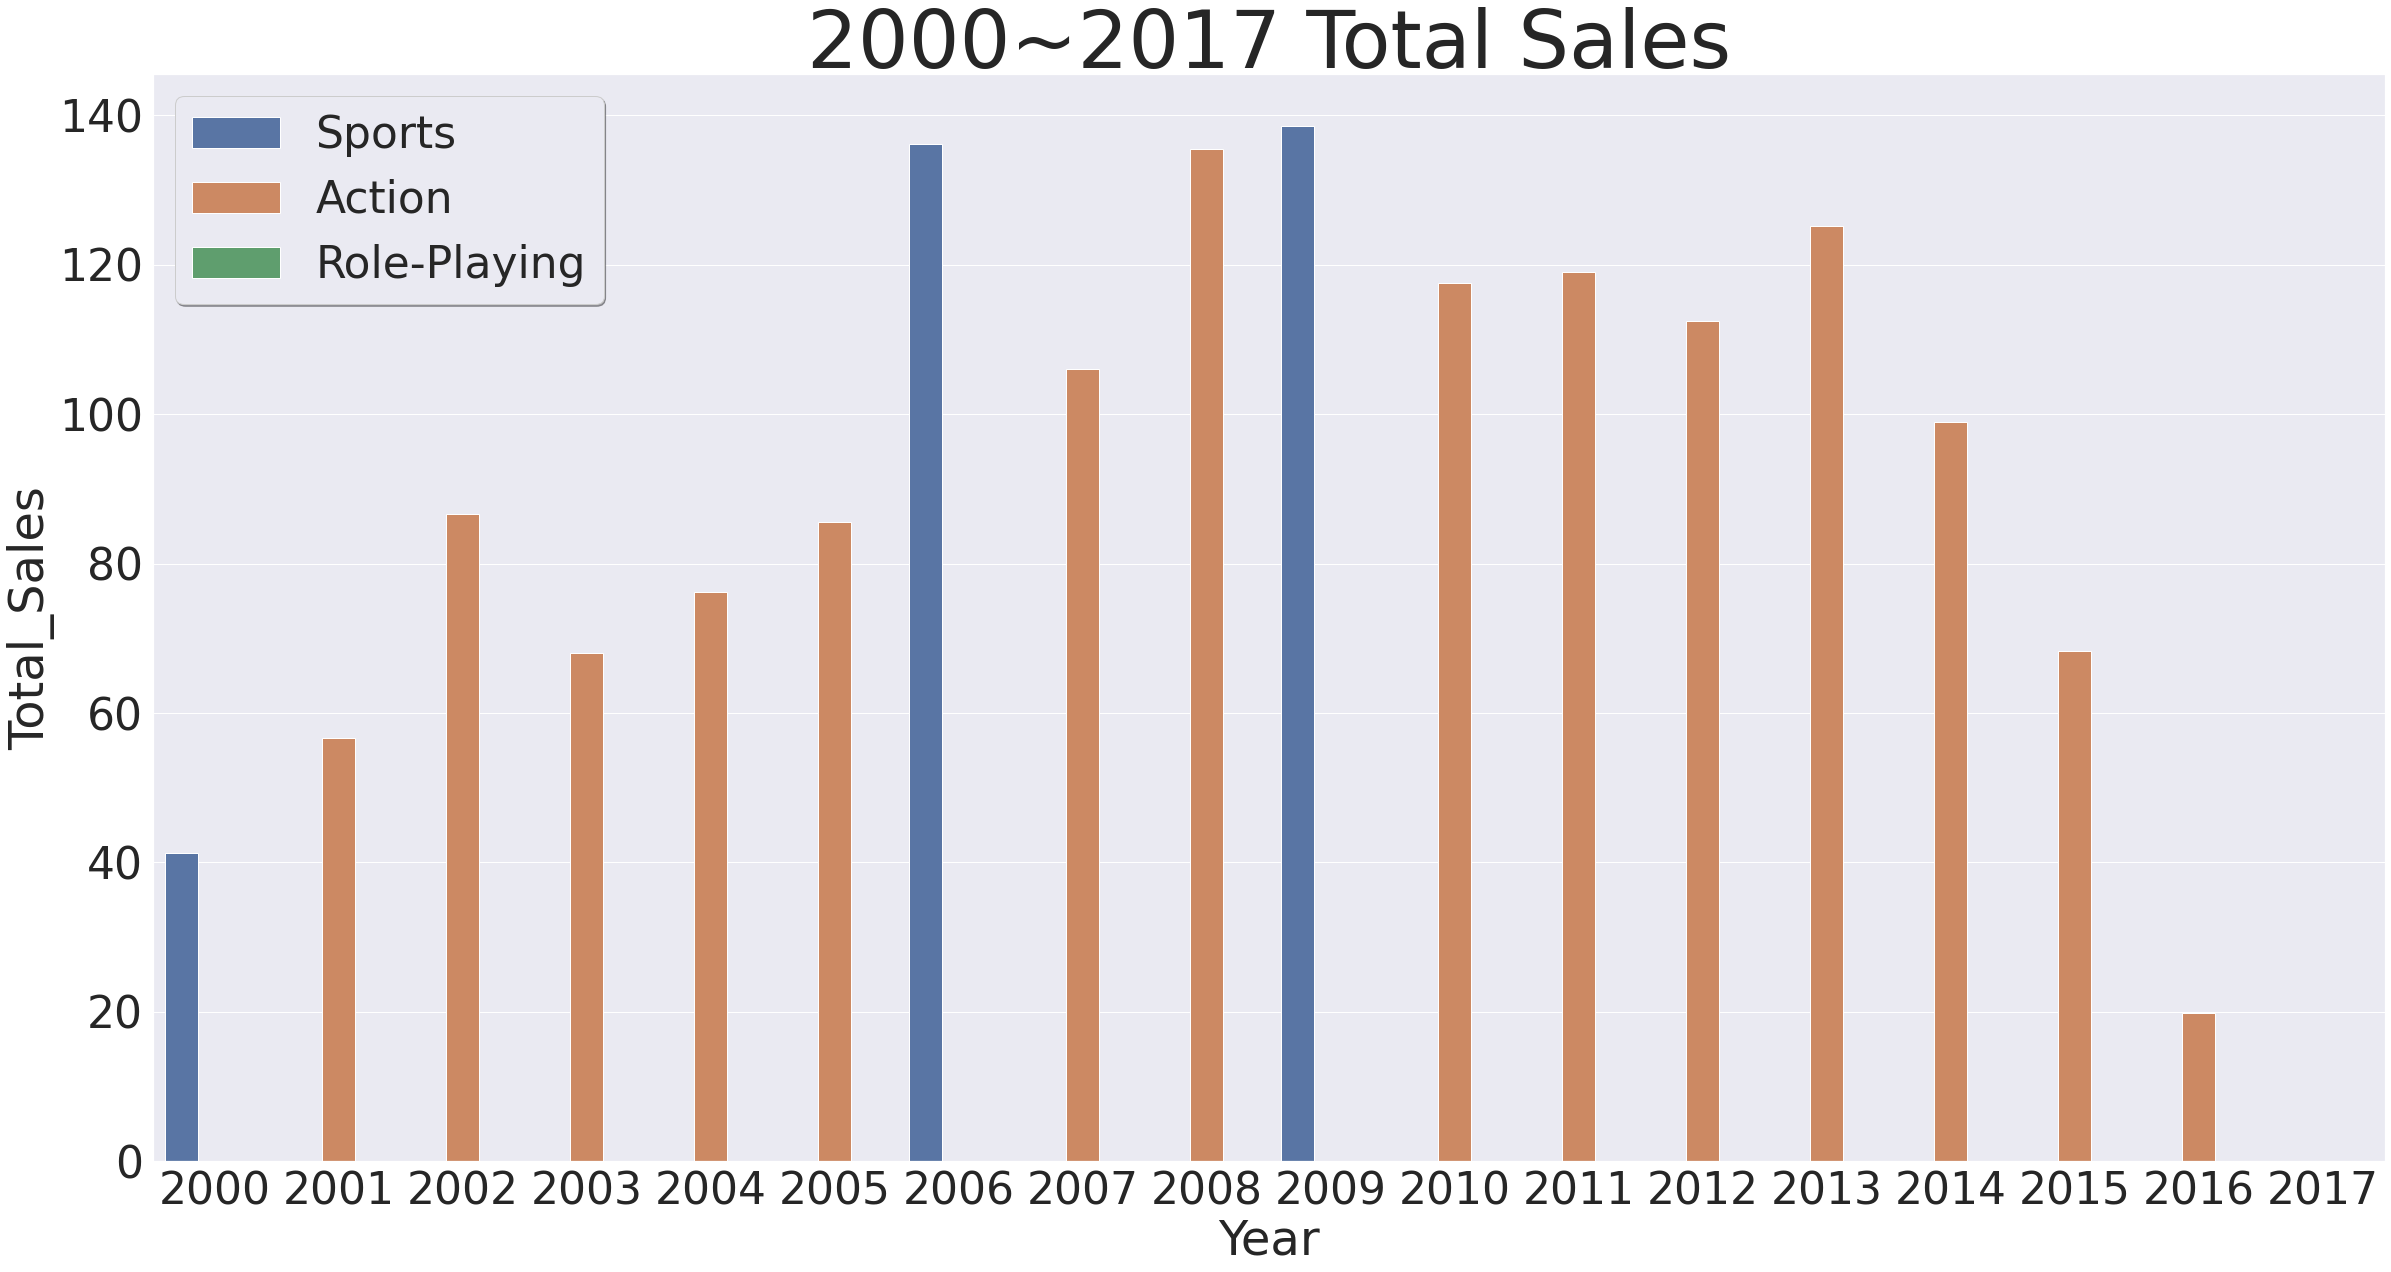

In [ ]:
# 장르,연도별 총판매량 데이터프레임 생성후 시각화
GYT = df_clean.groupby(['Year', 'Genre'], as_index=False)['Total_Sales'].sum()
GYT_bool = GYT.groupby('Year')['Total_Sales'].transform('max') == GYT['Total_Sales']  # 최대값이 맞는지 확인하는작업
GYT_max = GYT[GYT_bool]
GYT_2000down = GYT_max.query('Year < 2000')
GYT_2000up = GYT_max.query('Year >= 2000')  # 데이터의 연도수가 너무 많아 2000년 전후로 쪼갬
# 연도별 최대판매한 장르 시각화
plt.subplots(figsize=(50,18))
sns.set_color_codes("pastel")
sns.set_theme(style="darkgrid", font_scale=4)
sns.barplot(data=GYT_2000down, x='Year', y='Total_Sales', hue='Genre', orient='v')
plt.legend(loc='upper left', frameon=True, shadow=True)
plt.title('1980~1999 Total Sales', fontsize=80)
plt.show()
plt.subplots(figsize=(40,20))
sns.set_color_codes("pastel")
sns.set_theme(style="darkgrid", font_scale=4)
sns.barplot(data=GYT_2000up, x='Year', y='Total_Sales', hue='Genre', orient='v')
plt.legend(loc='upper left', frameon=True, shadow=True)
plt.title('2000~2017 Total Sales', fontsize=80)
plt.show()

## **4. Top 10 Games(추가비교)**


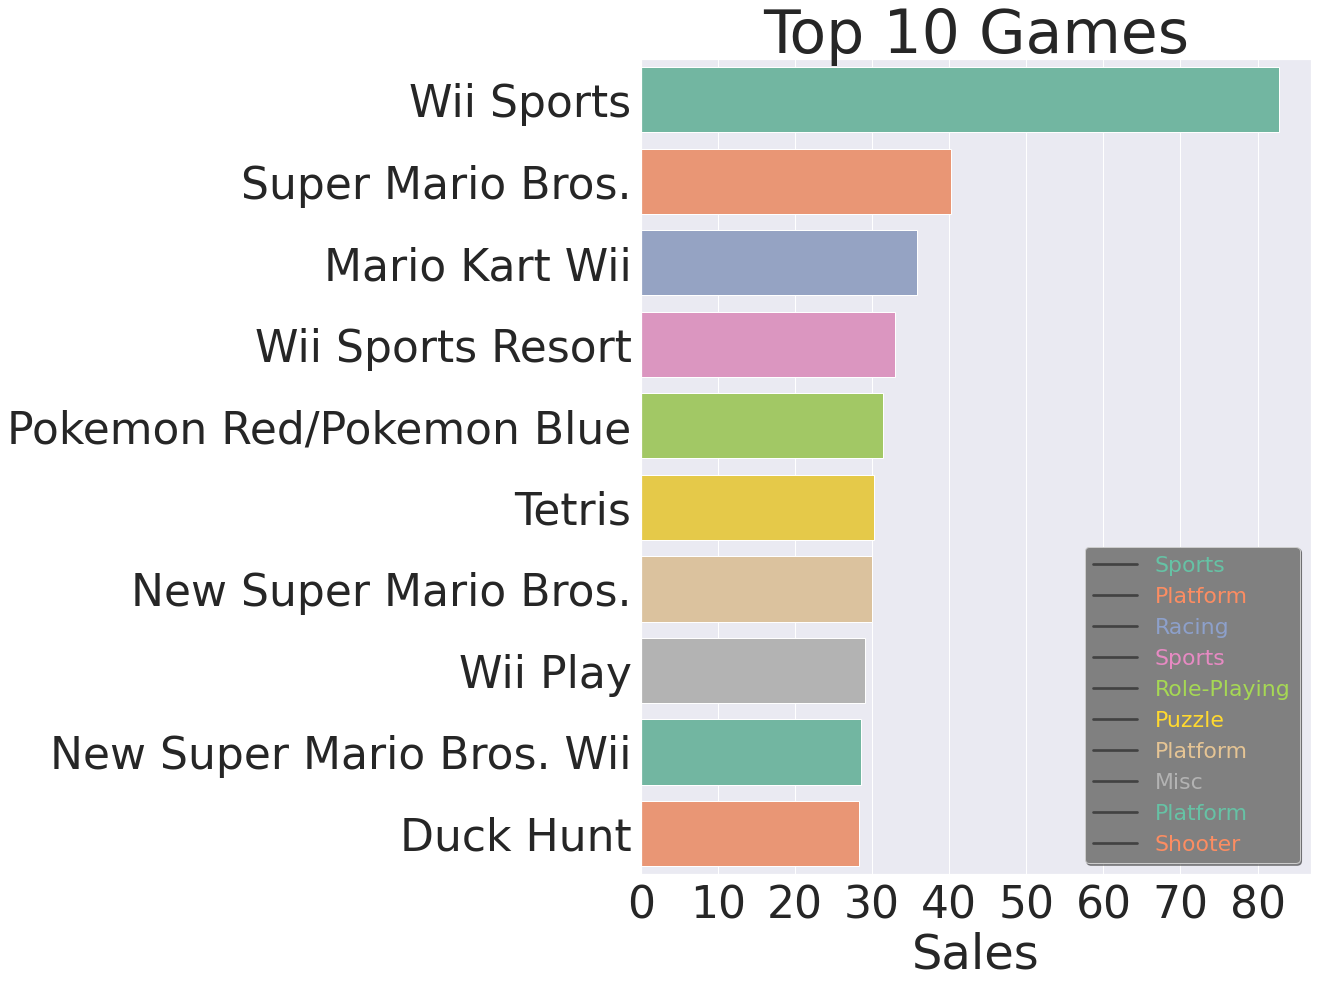

In [ ]:
# 판매량이 가장 많은 top 10 game 시각화
top10 = df_clean.sort_values(by='Total_Sales', ascending=False).head(10)
c = sns.color_palette("Set2")
# plot
plt.subplots(figsize=(12,15))
sns.set_theme(font_scale=2)
s = sns.barplot(data=top10, x='Total_Sales', y='Name', palette=c, orient='h')
s.set(xlabel='Sales', ylabel='')
plt.title('Top 10 Games', fontsize=60)
plt.legend(top10.Genre,loc='lower right', labelcolor=c, facecolor='gray', frameon=True, shadow=True)
plt.show()

#### ㅡ가장 많이 팔린 게임과 현재 트렌드인 액션게임 비교

In [ ]:
# 판매량이 높았던 게임이 시리즈물이므로 관련게임 필터링(액션장르만)
GTA = df_clean[df_clean.Name.str.contains('Grand Theft Auto')]
GTA.drop(index=942, inplace=True)
GTA = GTA.Total_Sales.sum()
GTA_sales = [{'GTA_sale' : GTA}]
GTA_sales = pd.DataFrame(GTA_sales)
# Wii스포츠도 시리즈물 이므로 관련게임 필터링
Wii = df_clean[df_clean.Name.str.contains('Wii Sports')]  
Wii = Wii.Total_Sales.sum()
Wii_sales = [{'Wii_sale' : Wii}]
Wii_sales = pd.DataFrame(Wii_sales)

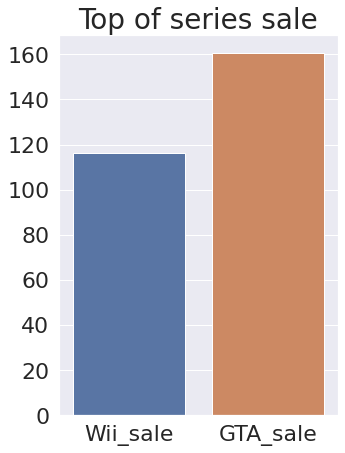

In [ ]:
# 두 시리즈의 총 판매량 비교 시각화
Wii_GTA = Wii_sales.join(GTA_sales)
plt.subplots(figsize=(5,7))
sns.barplot(data=Wii_GTA)
sns.set_theme(font_scale=1.5)
plt.title('Top of series sale', fontsize=28)
plt.show()

# **결론**

In [ ]:
# 단일제품 판매량으론 Wii Sports 가 가장 높지만 시리즈 전체 판매량으론 GTA 시리즈가 가장 많이 팔림.
# 따라서 다음 분기에 게임제작시 중요 포인트.
# 1. 지역은 North America, 플랫폼은 PS2,X360
# 2. 단일제품 기획시 장르는 Sport
# 3. 시리즈 제품 기획시 장르는 Action